# Import thư viện cần thiết

In [1]:
# Numeric and calculating
import pandas as pd 
import numpy as np 
import math

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Đọc dữ liệu

In [5]:
df = pd.read_excel('./data/THPT_2018_Quoc_gia.xlsx', engine='openpyxl')

KeyboardInterrupt: 

# Xem thông tin dữ liệu

In [ ]:
df.head()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1
0,1,18010226,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN
1,2,18010229,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.30,NaN
2,3,18010232,6.0,5.50,4.0,5.75,5.5,5.0,NaN,NaN,NaN,17.25,16.5,NaN,15.50,15.75
3,4,18010242,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN
4,5,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN


In [ ]:
df.describe()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1
count,744396.00000,7.443960e+05,741024.000000,728309.000000,659998.000000,323353.000000,326981.000000,319605.000000,446118.000000,433221.000000,379034.000000,321232.000000,319516.000000,432605.000000,656138.000000,307864.000000
mean,372198.50000,3.033333e+07,4.884162,5.444146,3.933543,4.961179,4.864391,4.561249,3.805371,5.483495,7.157468,15.523625,15.124206,14.622717,14.513534,15.042056
std,214888.75983,1.905104e+07,1.440636,1.447793,1.567942,1.531097,1.523851,1.244402,1.241262,1.257440,1.233368,3.633543,3.211462,3.238440,3.341804,3.462336
min,1.00000,1.000019e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186099.75000,1.500588e+07,3.800000,4.500000,2.800000,3.750000,3.750000,3.750000,3.000000,4.750000,6.500000,13.100000,13.000000,12.500000,12.200000,12.700000
50%,372198.50000,3.200454e+07,5.000000,5.500000,3.600000,5.000000,4.750000,4.500000,3.750000,5.500000,7.250000,15.650000,15.150000,14.500000,14.380000,14.900000
75%,558297.25000,4.700776e+07,6.000000,6.500000,4.600000,6.000000,6.000000,5.250000,4.500000,6.250000,8.000000,18.000000,17.200000,16.750000,16.700000,17.300000
max,744396.00000,6.400622e+07,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,29.050000,29.550000,28.500000,27.850000,28.950000


In [ ]:
df.dtypes

ID          int64
SoBD        int64
Toan      float64
Van       float64
Anh       float64
Ly        float64
Hoa       float64
Sinh      float64
Su        float64
Dia       float64
GDCD      float64
KhoiA     float64
KhoiB     float64
KhoiC     float64
KhoiD     float64
KhoiA1    float64
dtype: object

In [ ]:
df['code'] =  np.where(df['SoBD'] > 10000000, df['SoBD'].astype(str).str[:2], df['SoBD'].astype(str).str[:1])
df = df.astype({'code': int})

In [ ]:
df.head()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,code
0,1,18010226,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN,18
1,2,18010229,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.30,NaN,18
2,3,18010232,6.0,5.50,4.0,5.75,5.5,5.0,NaN,NaN,NaN,17.25,16.5,NaN,15.50,15.75,18
3,4,18010242,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN,18
4,5,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN,18


In [ ]:
df.describe()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,code
count,744396.00000,7.443960e+05,741024.000000,728309.000000,659998.000000,323353.000000,326981.000000,319605.000000,446118.000000,433221.000000,379034.000000,321232.000000,319516.000000,432605.000000,656138.000000,307864.000000,744396.000000
mean,372198.50000,3.033333e+07,4.884162,5.444146,3.933543,4.961179,4.864391,4.561249,3.805371,5.483495,7.157468,15.523625,15.124206,14.622717,14.513534,15.042056,30.321701
std,214888.75983,1.905104e+07,1.440636,1.447793,1.567942,1.531097,1.523851,1.244402,1.241262,1.257440,1.233368,3.633543,3.211462,3.238440,3.341804,3.462336,19.057832
min,1.00000,1.000019e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,186099.75000,1.500588e+07,3.800000,4.500000,2.800000,3.750000,3.750000,3.750000,3.000000,4.750000,6.500000,13.100000,13.000000,12.500000,12.200000,12.700000,15.000000
50%,372198.50000,3.200454e+07,5.000000,5.500000,3.600000,5.000000,4.750000,4.500000,3.750000,5.500000,7.250000,15.650000,15.150000,14.500000,14.380000,14.900000,32.000000
75%,558297.25000,4.700776e+07,6.000000,6.500000,4.600000,6.000000,6.000000,5.250000,4.500000,6.250000,8.000000,18.000000,17.200000,16.750000,16.700000,17.300000,47.000000
max,744396.00000,6.400622e+07,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,29.050000,29.550000,28.500000,27.850000,28.950000,64.000000


In [ ]:
df.code.unique()

array([18, 11, 19,  6, 62,  5, 24,  1, 30, 21, 23, 22,  7, 10,  8, 25, 27,
       15, 26, 12, 28,  9, 16, 13,  3, 60, 56, 37, 44, 43, 47, 61, 55,  4,
       40, 63, 48, 50, 38, 64,  2, 33, 41, 54, 36, 42, 49, 45, 39, 31, 34,
       35, 32, 59, 46, 53, 58, 57, 52])

# Lấy dữ liệu mã tỉnh từ trang Web

In [ ]:
base_url = 'https://thuvienphapluat.vn/cong-van/Giao-duc/Cong-van-417-BGDDT-KTKDCLGD-huong-dan-thuc-hien-Quy-che-thi-trung-hoc-pho-thong-quoc-gia-2017-339311.aspx'

In [ ]:
craw_data = pd.read_html(base_url)

In [ ]:
ma_co_so = craw_data[17]

In [ ]:
ma_co_so = ma_co_so.drop(ma_co_so.index[0])
ma_co_so.rename(columns={0: 'code', 1: 'ten co so', 2: 'ma cum co so', 3: 'ten hoi dong thi'}, inplace=True)
ma_co_so = ma_co_so.astype({'code': int})
del ma_co_so['ma cum co so']
del ma_co_so['ten hoi dong thi']

In [ ]:
ma_co_so

,code,ten co so
1,1,Sở GDĐT Hà Nội
2,2,Sở GDĐT TP. Hồ Chí Minh
3,3,Sở GDĐT Hải Phòng
4,4,Sở GDĐT Đà Nẵng
5,5,Sở GDĐT Hà Giang
...,...,...
60,61,Sở GDĐT Cà Mau
61,62,Sở GDĐT Điện Biên
62,63,Sở GDĐT Đăk Nông
63,64,Sở GDĐT Hậu Giang


# Gộp hai bản dữ liệu theo 'code'

In [ ]:
full_join_data = pd.merge(df, ma_co_so, how='outer', on='code')

In [ ]:
full_join_data.head()

,ID,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,code,ten co so
0,1.0,18010226.0,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,13.25,9.75,NaN,18,Sở GDĐT Bắc Giang
1,2.0,18010229.0,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,22.50,25.30,NaN,18,Sở GDĐT Bắc Giang
2,3.0,18010232.0,6.0,5.50,4.0,5.75,5.5,5.0,NaN,NaN,NaN,17.25,16.5,NaN,15.50,15.75,18,Sở GDĐT Bắc Giang
3,4.0,18010242.0,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,14.00,11.75,NaN,18,Sở GDĐT Bắc Giang
4,5.0,18010247.0,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,16.50,13.55,NaN,18,Sở GDĐT Bắc Giang


In [ ]:
full_join_data.groupby(['code'])['Toan'].describe()

,count,mean,std,min,25%,50%,75%,max
code,,,,,,,,
1,37993.0,5.304288,1.547857,0.0,4.2,5.6,6.4,9.6
2,78035.0,5.413035,1.241950,0.0,4.6,5.4,6.2,10.0
3,5094.0,5.256969,1.452611,0.8,4.2,5.4,6.4,9.2
4,6094.0,5.117788,1.442155,1.2,4.0,5.2,6.2,9.6
5,3089.0,3.494335,1.433978,1.0,2.6,3.2,4.2,9.6
...,...,...,...,...,...,...,...,...
61,9222.0,4.618933,1.268969,0.8,3.8,4.6,5.6,8.8
62,5372.0,4.114222,1.311870,0.4,3.2,4.0,5.0,9.6
63,6327.0,4.673020,1.375097,0.2,3.6,4.6,5.6,8.8


# Rút trích dữ liệu điểm thi Toán của Hà Giang

In [ ]:
math_df_ha_giang = df[df['code'] == 5]['Toan']

In [ ]:
math_df_ha_giang.head()

47345    1.4
47346    5.6
47347    3.8
47348    2.4
47349    9.4
Name: Toan, dtype: float64

# Rút trích dữ liệu điểm thi Toán của các tỉnh còn lại

In [ ]:
math_df_cac_tinh_con_lai = df[df['code'] != 5]['Toan']

In [ ]:
math_df_cac_tinh_con_lai.head()

0    3.0
1    8.8
2    6.0
3    3.4
4    3.8
Name: Toan, dtype: float64

# Trực quan hóa dữ liệu điểm Toán của Hà Giang so với các tỉnh còn lại
Sử dụng seaborn trực quan hóa phân phố điểm toán
Ta nhận ra điểm bất thường trong phân bố điểm Toán của Hà Giang

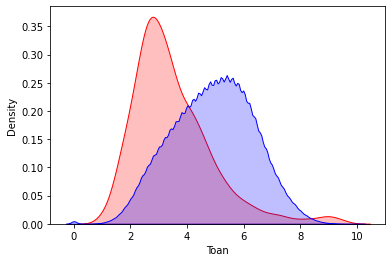

In [ ]:
fig = sns.kdeplot(math_df_ha_giang, shade=True, color="r")
fig = sns.kdeplot(math_df_cac_tinh_con_lai, shade=True, color="b")
plt.show()